# 선릉역 반경 150m 택시승차 데이터 시계열 분해

## 필요모듈 import

In [8]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
from matplotlib import rc

# 시각화 그래프 '-' & 한글 깨짐 현상 처리
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

mpl.rcParams['axes.unicode_minus'] = False
font_name = fm.FontProperties(fname='c:\\windows\\fonts\\malgun.ttf').get_name()
rc('font', family=font_name)

# 경고메시지 숨김
import warnings
warnings.filterwarnings(action='ignore')
# 경고메시지 다시 보이게
#warnings.filterwarnings(action='default')

from statsmodels.tsa.seasonal import seasonal_decompose

## 데이터 준비

### 데이터 로드

In [12]:
taxi = pd.read_csv('data/T-Money/seolleung_dataset.csv')
taxi

,o_time,yesterday,today,tomorrow,temp,windspeed,humidity,cloud,precipitation,snowcover,visibility,user,count
0,2018-10-01 00:00:00,1,0,0,14.1,2.6,55,0.0,0.0,0.0,2000,1.0,52
1,2018-10-01 01:00:00,1,0,0,13.9,2.0,57,2.0,0.0,0.0,2000,1.0,17
2,2018-10-01 02:00:00,1,0,0,13.9,2.4,56,4.0,0.0,0.0,2000,1.0,10
3,2018-10-01 03:00:00,1,0,0,13.6,1.6,56,8.0,0.0,0.0,2000,1.0,13
4,2018-10-01 04:00:00,1,0,0,13.7,1.9,56,10.0,0.0,0.0,2000,1.0,12
5,2018-10-01 05:00:00,1,0,0,13.7,1.8,57,8.0,0.0,0.0,1999,1.0,8
6,2018-10-01 06:00:00,1,0,0,13.3,2.3,56,7.0,0.0,0.0,2000,1.0,14
7,2018-10-01 07:00:00,1,0,0,13.1,2.1,58,3.0,0.0,0.0,1997,1.0,31
8,2018-10-01 08:00:00,1,0,0,13.7,2.4,54,7.0,0.0,0.0,1960,1.0,148
9,2018-10-01 09:00:00,1,0,0,14.9,3.4,50,1.0,0.0,0.0,1989,1.0,130


### hour 컬럼 생성 및 ts 인덱스

In [20]:
# 시간 변수 추가를 위해 o_time 컬럼 데이터타입 문자열에서 datetime 으로 변경
taxi['o_time'] = taxi.o_time.apply(pd.to_datetime)
#taxi['o_time'] = pd.to_datetime(taxi['o_time'],format='%Y-%m-%d %H:%M:%S')

# datetime 타입에서 년,월,일,시간 추출
#taxi['year'] = taxi['o_time'].dt.year
#taxi['month'] = taxi['o_time'].dt.month
#taxi['day'] = taxi['o_time'].dt.day
taxi['hour'] = taxi['o_time'].dt.hour
taxi.set_index('o_time',inplace=True)
taxi

,yesterday,today,tomorrow,temp,windspeed,humidity,cloud,precipitation,snowcover,visibility,user,count,hour
o_time,,,,,,,,,,,,,
2018-10-01 00:00:00,1,0,0,14.1,2.6,55,0.0,0.0,0.0,2000,1.0,52,0
2018-10-01 01:00:00,1,0,0,13.9,2.0,57,2.0,0.0,0.0,2000,1.0,17,1
2018-10-01 02:00:00,1,0,0,13.9,2.4,56,4.0,0.0,0.0,2000,1.0,10,2
2018-10-01 03:00:00,1,0,0,13.6,1.6,56,8.0,0.0,0.0,2000,1.0,13,3
2018-10-01 04:00:00,1,0,0,13.7,1.9,56,10.0,0.0,0.0,2000,1.0,12,4
2018-10-01 05:00:00,1,0,0,13.7,1.8,57,8.0,0.0,0.0,1999,1.0,8,5
2018-10-01 06:00:00,1,0,0,13.3,2.3,56,7.0,0.0,0.0,2000,1.0,14,6
2018-10-01 07:00:00,1,0,0,13.1,2.1,58,3.0,0.0,0.0,1997,1.0,31,7
2018-10-01 08:00:00,1,0,0,13.7,2.4,54,7.0,0.0,0.0,1960,1.0,148,8


## 시계열 분해

### 2018-10-01 ~ 2019-03-31 전체

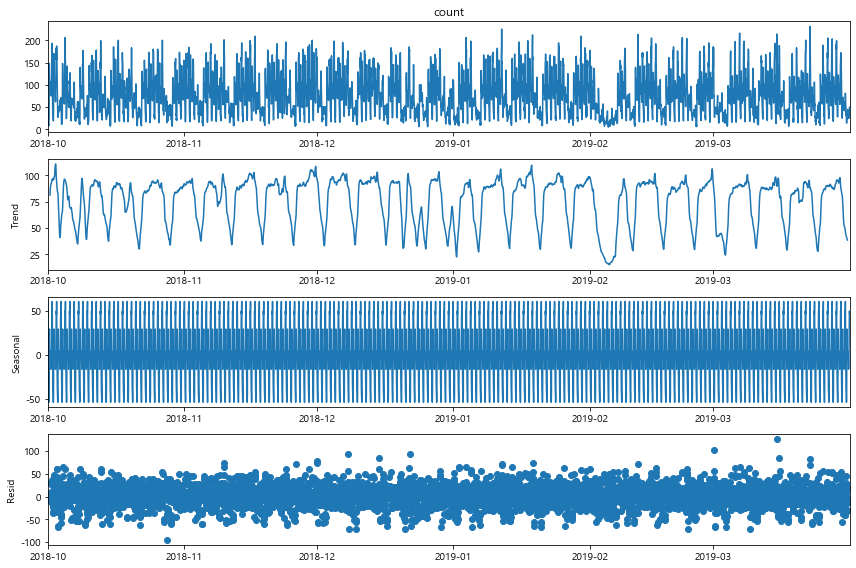

In [58]:
ts = taxi['count']
res = seasonal_decompose(ts,model='additive')
#plt.rcParams['figure.figsize']=[12,8]
res.plot()
plt.show()

#### 관측치(Observed)

In [48]:
print(res.observed)

o_time
2018-10-01 00:00:00     52.0
2018-10-01 01:00:00     17.0
2018-10-01 02:00:00     10.0
2018-10-01 03:00:00     13.0
2018-10-01 04:00:00     12.0
2018-10-01 05:00:00      8.0
2018-10-01 06:00:00     14.0
2018-10-01 07:00:00     31.0
2018-10-01 08:00:00    148.0
2018-10-01 09:00:00    130.0
2018-10-01 10:00:00     94.0
2018-10-01 11:00:00     89.0
2018-10-01 12:00:00    107.0
2018-10-01 13:00:00     95.0
2018-10-01 14:00:00     82.0
2018-10-01 15:00:00     97.0
2018-10-01 16:00:00     88.0
2018-10-01 17:00:00     80.0
2018-10-01 18:00:00     75.0
2018-10-01 19:00:00     88.0
2018-10-01 20:00:00    112.0
2018-10-01 21:00:00    120.0
2018-10-01 22:00:00    170.0
2018-10-01 23:00:00    147.0
2018-10-02 00:00:00    193.0
2018-10-02 01:00:00    100.0
2018-10-02 02:00:00     53.0
2018-10-02 03:00:00     33.0
2018-10-02 04:00:00     37.0
2018-10-02 05:00:00     31.0
                       ...  
2019-03-30 18:00:00     54.0
2019-03-30 19:00:00     42.0
2019-03-30 20:00:00     61.0
2019-03

#### 추세(Trend & Cycle)

In [49]:
print(res.trend)

o_time
2018-10-01 00:00:00          NaN
2018-10-01 01:00:00          NaN
2018-10-01 02:00:00          NaN
2018-10-01 03:00:00          NaN
2018-10-01 04:00:00          NaN
2018-10-01 05:00:00          NaN
2018-10-01 06:00:00          NaN
2018-10-01 07:00:00          NaN
2018-10-01 08:00:00          NaN
2018-10-01 09:00:00          NaN
2018-10-01 10:00:00          NaN
2018-10-01 11:00:00          NaN
2018-10-01 12:00:00    81.229167
2018-10-01 13:00:00    85.895833
2018-10-01 14:00:00    88.520833
2018-10-01 15:00:00    89.833333
2018-10-01 16:00:00    90.770833
2018-10-01 17:00:00    91.770833
2018-10-01 18:00:00    92.354167
2018-10-01 19:00:00    92.541667
2018-10-01 20:00:00    92.895833
2018-10-01 21:00:00    94.000000
2018-10-01 22:00:00    95.250000
2018-10-01 23:00:00    95.958333
2018-10-02 00:00:00    95.854167
2018-10-02 01:00:00    95.770833
2018-10-02 02:00:00    96.520833
2018-10-02 03:00:00    96.937500
2018-10-02 04:00:00    96.833333
2018-10-02 05:00:00    96.458333
   

#### 계절성(Seasonality)

In [52]:
print(res.seasonal)

o_time
2018-10-01 00:00:00    60.482797
2018-10-01 01:00:00    19.369768
2018-10-01 02:00:00    -6.819114
2018-10-01 03:00:00   -29.631383
2018-10-01 04:00:00   -39.789648
2018-10-01 05:00:00   -47.866075
2018-10-01 06:00:00   -53.569114
2018-10-01 07:00:00   -45.883800
2018-10-01 08:00:00    16.817051
2018-10-01 09:00:00    29.293686
2018-10-01 10:00:00     3.037010
2018-10-01 11:00:00    -2.372751
2018-10-01 12:00:00    -4.601802
2018-10-01 13:00:00     4.173405
2018-10-01 14:00:00     2.615854
2018-10-01 15:00:00    -0.077056
2018-10-01 16:00:00    -4.535504
2018-10-01 17:00:00   -16.204358
2018-10-01 18:00:00   -15.147728
2018-10-01 19:00:00   -11.195955
2018-10-01 20:00:00     9.582475
2018-10-01 21:00:00    36.634616
2018-10-01 22:00:00    49.579828
2018-10-01 23:00:00    46.107797
2018-10-02 00:00:00    60.482797
2018-10-02 01:00:00    19.369768
2018-10-02 02:00:00    -6.819114
2018-10-02 03:00:00   -29.631383
2018-10-02 04:00:00   -39.789648
2018-10-02 05:00:00   -47.866075
   

#### 잔차(Residual)

In [54]:
print(res.resid)

o_time
2018-10-01 00:00:00          NaN
2018-10-01 01:00:00          NaN
2018-10-01 02:00:00          NaN
2018-10-01 03:00:00          NaN
2018-10-01 04:00:00          NaN
2018-10-01 05:00:00          NaN
2018-10-01 06:00:00          NaN
2018-10-01 07:00:00          NaN
2018-10-01 08:00:00          NaN
2018-10-01 09:00:00          NaN
2018-10-01 10:00:00          NaN
2018-10-01 11:00:00          NaN
2018-10-01 12:00:00    30.372636
2018-10-01 13:00:00     4.930762
2018-10-01 14:00:00    -9.136688
2018-10-01 15:00:00     7.243722
2018-10-01 16:00:00     1.764671
2018-10-01 17:00:00     4.433524
2018-10-01 18:00:00    -2.206439
2018-10-01 19:00:00     6.654288
2018-10-01 20:00:00     9.521692
2018-10-01 21:00:00   -10.634616
2018-10-01 22:00:00    25.170172
2018-10-01 23:00:00     4.933870
2018-10-02 00:00:00    36.663036
2018-10-02 01:00:00   -15.140601
2018-10-02 02:00:00   -36.701720
2018-10-02 03:00:00   -34.306117
2018-10-02 04:00:00   -20.043686
2018-10-02 05:00:00   -17.592258
   

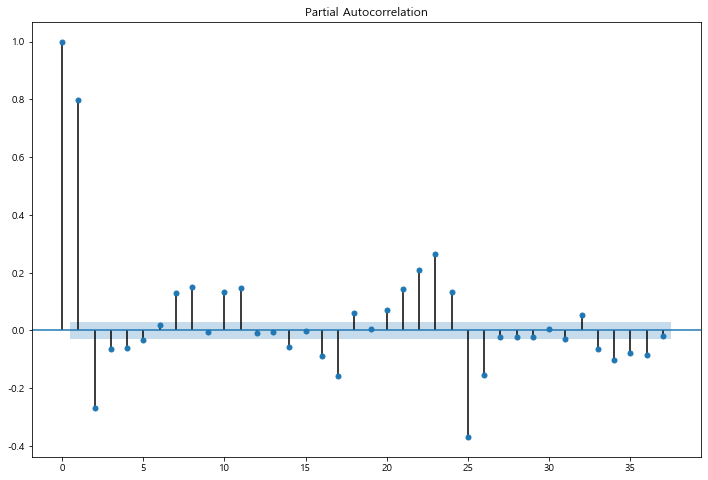

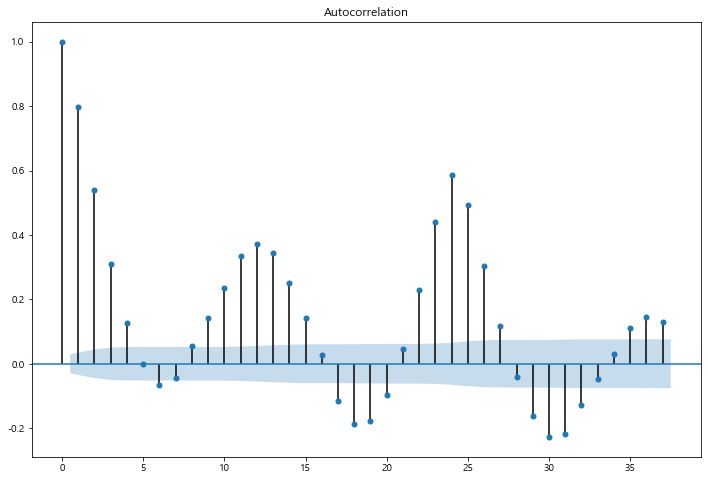

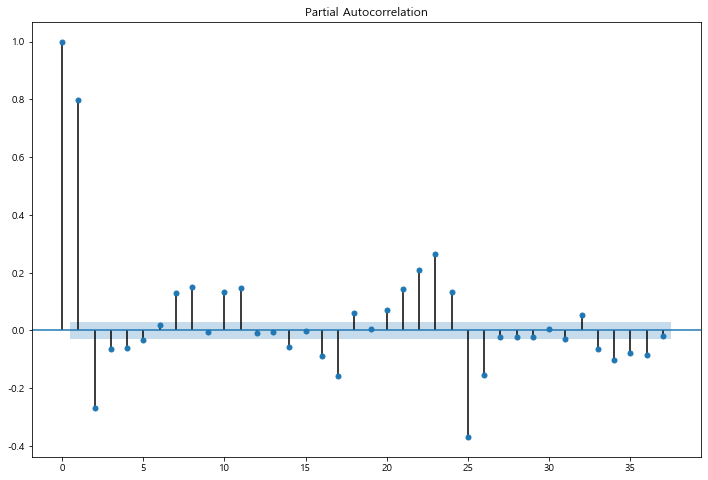

In [59]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(taxi['count'])
plot_pacf(taxi['count'])

### 2018-10

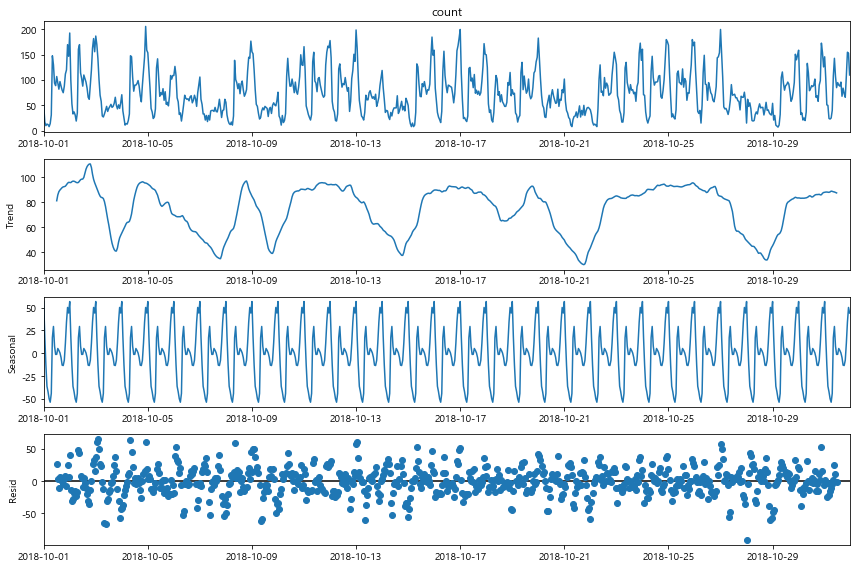

In [23]:
ts = taxi['2018-10']['count']
res = seasonal_decompose(ts,model='additive')
plt.rcParams['figure.figsize']=[12,8]
res.plot()
plt.show()

### 2018-11

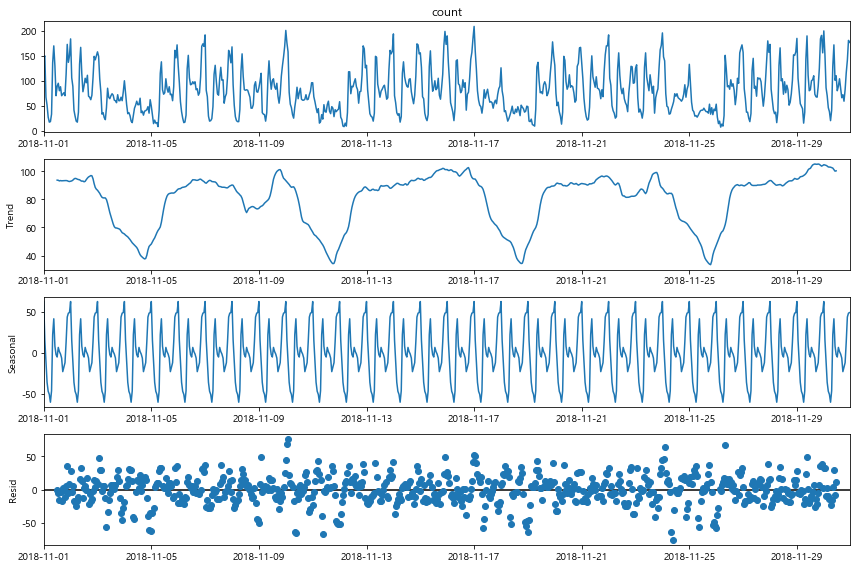

In [27]:
ts = taxi['2018-11']['count']
res = seasonal_decompose(ts,model='additive')
plt.rcParams['figure.figsize']=[12,8]
res.plot()
plt.show()

### 2018-12

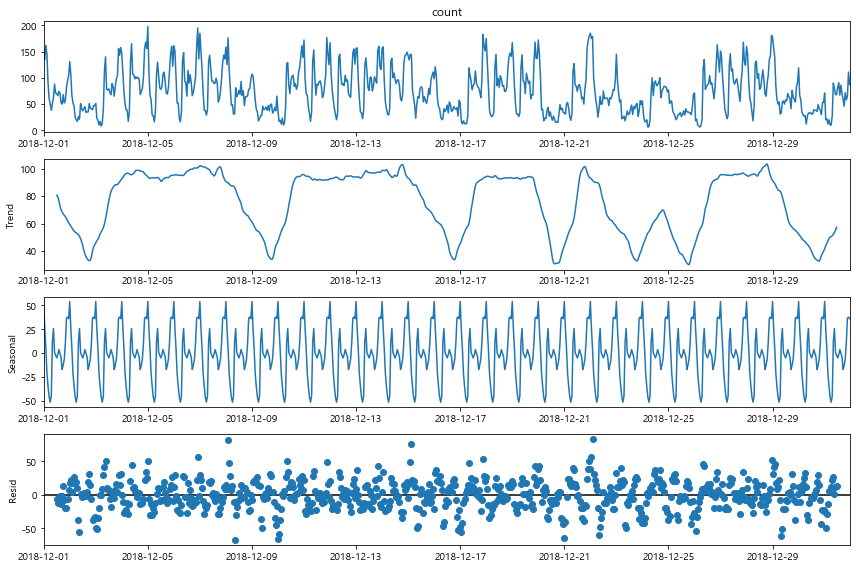

In [28]:
ts = taxi['2018-12']['count']
res = seasonal_decompose(ts,model='additive')
plt.rcParams['figure.figsize']=[12,8]
res.plot()
plt.show()

### 2019-01

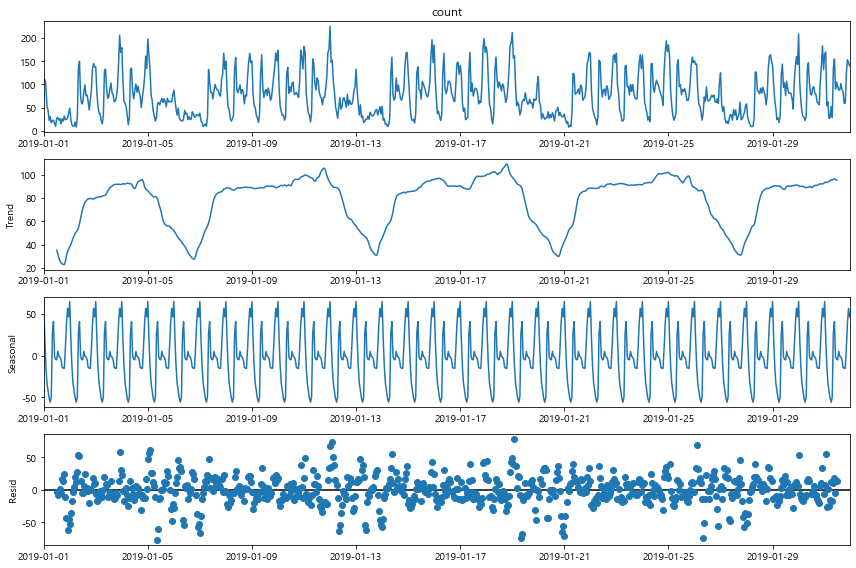

In [30]:
ts = taxi['2019-01']['count']
res = seasonal_decompose(ts,model='additive')
plt.rcParams['figure.figsize']=[12,8]
res.plot()
plt.show()

### 2019-02

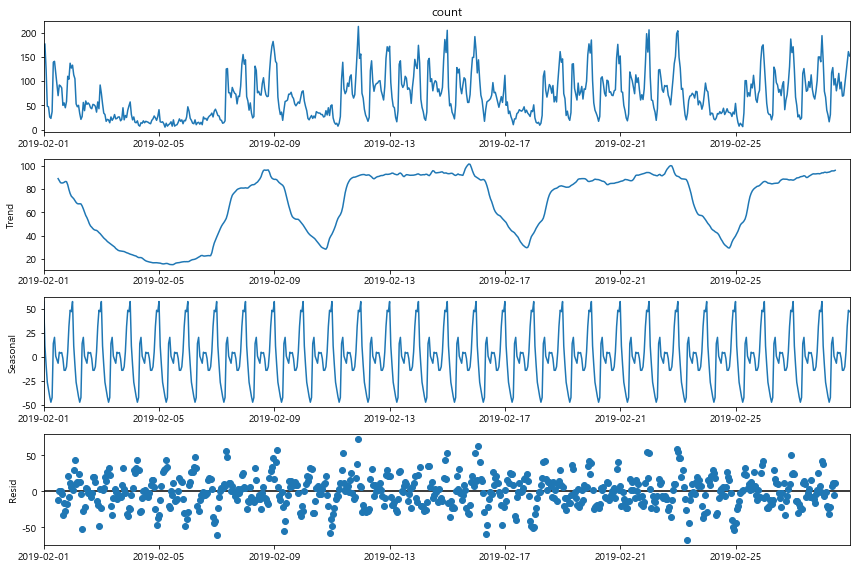

In [29]:
ts = taxi['2019-02']['count']
res = seasonal_decompose(ts,model='additive')
plt.rcParams['figure.figsize']=[12,8]
res.plot()
plt.show()

### 2019-03

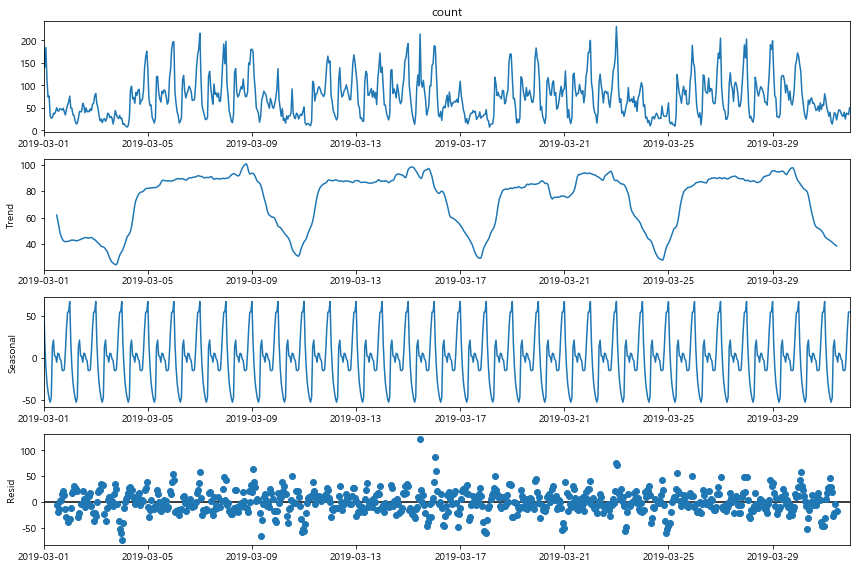

In [31]:
ts = taxi['2019-03']['count']
res = seasonal_decompose(ts,model='additive')
plt.rcParams['figure.figsize']=[12,8]
res.plot()
plt.show()

### 일주일

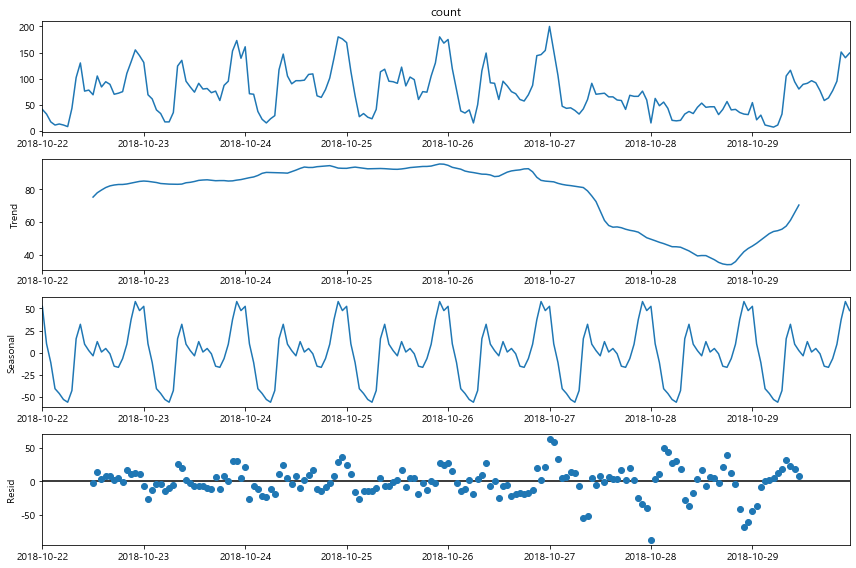

In [45]:
ts = taxi['2018-10-22':'2018-10-29']['count']
res = seasonal_decompose(ts,model='additive')
plt.rcParams['figure.figsize']=[12,8]
res.plot()
plt.show()